In [1]:
using DifferentialEquations
using LinearAlgebra
using ControlSystems
using Plots

In [2]:
g = 9.81
nom_v = 12
stall_t = 2.42
stall_c = 133
free_c = 2.7
free_s = 5310

R = nom_v / stall_c
Kₜ = stall_t / stall_c
Kᵥ = free_s / (nom_v - R * free_c)
m = 2.2675
l = 1.2192
J = (1/3) * m * l^2
G = 1 / 2

Gₗ = G
Gᵣ = G
r = 0.08255 / 2.0
rb = 0.59055 / 2.0
J = 6.0
m = 52

52

In [3]:
function diff_drive(x′, x, u, t)
    θ = x[3]
    vl = x[4]
    vr = x[5]
    v = (vl + vr) / 2

    C1 = -(Gₗ^2 * Kₜ)/(Kᵥ * R * r^2)
    C2 = (Gₗ * Kₜ) / (R * r)
    C3 = -(Gᵣ^2 * Kₜ)/(Kᵥ * R * r^2)
    C4 = (Gᵣ * Kₜ) / (R * r)

    A = [0 0 -v*sin(θ) cos(θ)/2 cos(θ)/2
         0 0 v*cos(θ) sin(θ)/2 sin(θ)/2
         0 0 0 -1/(2*rb) 1/(2*rb)
         0 0 0 (1/m + (rb^2)/J)*C1 (1/m - (rb^2)/J)*C3
         0 0 0 (1/m - (rb^2)/J)*C1 (1/m + (rb^2)/J)*C3]
    B = [0 0
         0 0
         0 0
         (1/m + (rb^2)/J)*C2 (1/m - (rb^2)/J)*C4
         (1/m - (rb^2)/J)*C2 (1/m + (rb^2)/J)*C4]

    lqr_Q = I
    lqr_R = I
    K = dlqr(A, B, lqr_Q, lqr_R)
    @show A
    @show B
    @show K
    @show u(x, K)

    x′ .= A * x + B * u(x, K)
end

diff_drive (generic function with 1 method)

In [4]:
function uff(x, K)
    θ = x[3]
    ft = [cos(θ) sin(θ) 0 0 0
          -sin(θ) cos(θ) 0 0 0
          0 0 1 0 0
          0 0 0 1 0
          0 0 0 0 1]
    ref = transpose([0 0 0 1 1])

    @show K * ft
    @show ref - x
    @show K * ft * (ref - x)
    K * ft * (ref - x)
end

uff (generic function with 1 method)

In [6]:
x0 = transpose([0 0 0 0 0])
tspan = (0.0, 4.0)
prob = ODEProblem(diff_drive, x0, tspan, uff)
sol = solve(prob)

A = [0.0 0.0 -0.0 0.5 0.5; 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 -1.6933367200067733 1.6933367200067733; 0.0 0.0 0.0 -0.002212113995892516 -0.0003079183573628352; 0.0 0.0 0.0 -0.0003079183573628352 -0.002212113995892516]
B = [0.0 0.0; 0.0 0.0; 0.0 0.0; 0.08247932183243645 0.01148082664012875; 0.01148082664012875 0.08247932183243645]
K = [0.0 0.0 0.0 -0.0006155750255851909 0.0002650409476458585; 0.0 0.0 0.0 0.0002650409476459207 -0.0006155750255853]
K * ft = [0.0 0.0 0.0 -0.0006155750255851909 0.0002650409476458585; 0.0 0.0 0.0 0.0002650409476459207 -0.0006155750255853]
ref - x = [0.0; 0.0; 0.0; 1.0; 1.0]
K * ft * (ref - x) = [-0.0003505340779393324; -0.0003505340779393793]
u(x, K) = [-0.0003505340779393324; -0.0003505340779393793]
K * ft = [0.0 0.0 0.0 -0.0006155750255851909 0.0002650409476458585; 0.0 0.0 0.0 0.0002650409476459207 -0.0006155750255853]
ref - x = [0.0; 0.0; 0.0; 1.0; 1.0]
K * ft * (ref - x) = [-0.0003505340779393324; -0.0003505340779393793]
A = [0.0 0.0 -0.0 0.5 0.5; 0.0 0.0 

ref - x = [1.6468115638678156e-13; -1.1886988306091463e-39; 5.9083516938505906e-27; 1.000000003293623; 1.000000003293623]
K * ft * (ref - x) = [-0.00035053407909388406; -0.0003505340790938847]
u(x, K) = [-0.00035053407909388406; -0.0003505340790938847]
K * ft = [0.0 0.0 -2.9742470132307153e-28 -0.0006155750255852152 0.00026504094764585824; 0.0 0.0 -5.731179747919722e-27 0.00026504094764585775 -0.0006155750255852154]
ref - x = [1.6468115638678156e-13; -1.1886988306091463e-39; 5.9083516938505906e-27; 1.000000003293623; 1.000000003293623]
K * ft * (ref - x) = [-0.00035053407909388406; -0.0003505340790938847]
A = [0.0 0.0 -1.1808899866050392e-34 0.5 0.5; 0.0 0.0 -8.59635534763704e-9 -6.8685503265616e-27 -6.8685503265616e-27; 0.0 0.0 0.0 -1.6933367200067733 1.6933367200067733; 0.0 0.0 0.0 -0.002212113995892516 -0.0003079183573628352; 0.0 0.0 0.0 -0.0003079183573628352 -0.002212113995892516]
B = [0.0 0.0; 0.0 0.0; 0.0 0.0; 0.08247932183243645 0.01148082664012875; 0.01148082664012875 0.082479

A = [0.0 0.0 -1.6161006434603446e-30 0.5 0.5; 0.0 0.0 -1.439305559612216e-7 -5.6141680016012775e-24 -5.6141680016012775e-24; 0.0 0.0 0.0 -1.6933367200067733 1.6933367200067733; 0.0 0.0 0.0 -0.002212113995892516 -0.0003079183573628352; 0.0 0.0 0.0 -0.0003079183573628352 -0.002212113995892516]
B = [0.0 0.0; 0.0 0.0; 0.0 0.0; 0.08247932183243645 0.01148082664012875; 0.01148082664012875 0.08247932183243645]
K = [0.0 0.0 1.3602426741831424e-24 -0.0006155750255852453 0.00026504094764589076; 0.0 0.0 -1.3808084823479814e-24 0.00026504094764588784 -0.0006155750255852482]
K * ft = [0.0 0.0 1.3602426741831424e-24 -0.0006155750255852453 0.00026504094764589076; 0.0 0.0 -1.3808084823479814e-24 0.00026504094764588784 -0.0006155750255852482]
ref - x = [3.1629384531050976e-10; -7.233476430051674e-34; 1.1228336003202555e-23; 1.000000143930556; 1.000000143930556]
K * ft * (ref - x) = [-0.00035053412839191933; -0.000350534128391925]
u(x, K) = [-0.00035053412839191933; -0.000350534128391925]
K * ft = [0.0 

ref - x = [1.6750998112534934e-7; -3.0249055022473526e-27; 1.2957042838957987e-20; 1.0000033294366448; 1.0000033294366448]
K * ft * (ref - x) = [-0.0003505352450203618; -0.00035053524502036204]
A = [0.0 0.0 -5.058395611145813e-26 0.5 0.5; 0.0 0.0 -3.5929430798984098e-6 -7.039348381896492e-21 -7.039348381896492e-21; 0.0 0.0 0.0 -1.6933367200067733 1.6933367200067733; 0.0 0.0 0.0 -0.002212113995892516 -0.0003079183573628352; 0.0 0.0 0.0 -0.0003079183573628352 -0.002212113995892516]
B = [0.0 0.0; 0.0 0.0; 0.0 0.0; 0.08247932183243645 0.01148082664012875; 0.01148082664012875 0.08247932183243645]
K = [0.0 0.0 -2.412606667415945e-23 -0.0006155750255899438 0.0002650409476505816; 0.0 0.0 -1.1167693902025125e-23 0.0002650409476505351 -0.0006155750255898621]
K * ft = [0.0 0.0 -2.412606667415945e-23 -0.0006155750255899438 0.0002650409476505816; 0.0 0.0 -1.1167693902025125e-23 0.0002650409476505351 -0.0006155750255898621]
ref - x = [1.9467381168421867e-7; -4.077125448640335e-27; 1.4078696763792983

ref - x = [2.0151517562143046e-5; -3.4304629274213173e-23; -1.2528437815454227e-18; 1.000036545330845; 1.000036545330845]
K * ft * (ref - x) = [-0.0003505468883232132; -0.0003505468883231965]
u(x, K) = [-0.0003505468883232132; -0.0003505468883231965]
K * ft = [0.0 0.0 2.0062022711297305e-22 -0.0006155750260695159 0.00026504094813015357; 0.0 0.0 -1.3885182674370874e-22 0.00026504094813013183 -0.0006155750260694776]
ref - x = [2.0151517562143046e-5; -3.4304629274213173e-23; -1.2528437815454227e-18; 1.000036545330845; 1.000036545330845]
K * ft * (ref - x) = [-0.0003505468883232132; -0.0003505468883231965]
A = [0.0 0.0 -7.488787624988905e-23 0.5 0.5; 0.0 0.0 -3.6544931989129176e-5 -1.0246000221339247e-18 -1.0246000221339247e-18; 0.0 0.0 0.0 -1.6933367200067733 1.6933367200067733; 0.0 0.0 0.0 -0.002212113995892516 -0.0003079183573628352; 0.0 0.0 0.0 -0.0003079183573628352 -0.002212113995892516]
B = [0.0 0.0; 0.0 0.0; 0.0 0.0; 0.08247932183243645 0.01148082664012875; 0.01148082664012875 0.08

retcode: Success
Interpolation: automatic order switching interpolation
t: 7-element Array{Float64,1}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 1.1110999999999995
 4.0
u: 7-element Array{Array{Float64,2},1}:
 [0.0; 0.0; … ; 0.0; 0.0]
 [-1.6468115638678156e-13; 1.1886988306091463e-39; … ; -3.293622991209701e-9; -3.2936229912097297e-9]
 [-1.992640340317098e-11; 1.7271410600491695e-36; … ; -3.622980784978254e-8; -3.622980784978286e-8]
 [-2.0290180244696646e-9; 9.527119678479247e-32; … ; -3.65587151124505e-7; -3.655871511245838e-7]
 [-2.0325070555346407e-7; 3.55294794260194e-27; … ; -3.658710094233873e-6; -3.65871009423437e-6]
 [-2.0311887679436537e-5; 4.033170150794895e-23; … ; -3.654493198912857e-5; -3.6544931989129786e-5]
 [-0.0002626182747024784; 2.786838094893836e-21; … ; -0.00013109177913964593; -0.00013109177913964823]

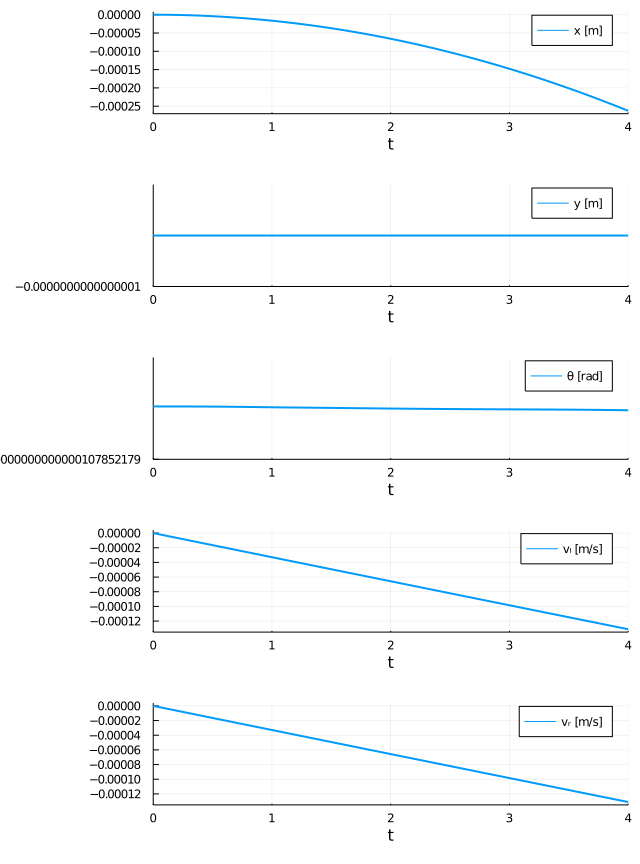

In [7]:
plot(sol,linewidth=2,xaxis="t",label=["x [m]" "y [m]" "θ [rad]" "vₗ [m/s]" "vᵣ [m/s]"],layout=(5,1),size=(640,480*1.8))